In [1]:
import mlflow
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from pickle import dump

from scripts.Preprocessing import Preprocessing
from scripts.LinearRegressionTraining import LinearRegressionTraining

from scripts.config import (year_month_train,
    model_name_pref,
    input_data_path_train,
    seed)

In [2]:
local_path_save = './local_artifacts_tmp/00_Regression_Baseline/'
year_month = year_month_train
input_data_path = input_data_path_train

### MLFlow setting

In [3]:
if not os.path.exists(local_path_save):
    os.makedirs(local_path_save)

#save all metadata in a sqlite db. Artifacts will be saved on local folder ./mlflow    
mlflow.set_tracking_uri("sqlite:///mlflow.db")

# Name of the experiment
exp_name = "00 - Regression Baseline"
# set up MlFlow axperiment
experiment_id = mlflow.set_experiment(exp_name)

## Experiments

In [4]:
run_name = 'base'

In [5]:
baseline_regression_training = LinearRegressionTraining(
    input_data_path,
    local_path_save,
    year_month,
    'baseline_regression')

In [6]:
prepr = Preprocessing(input_data_path_train)
X, Y = prepr.read_dataframe(request_tgt=True)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=seed)

In [7]:
baseline_regression_training.calculate_regression_baseline(Y_train=Y_train, Y_test=Y_test, run_name=run_name)

{'loss': 7.211841215227615, 'status': 'ok'}

In [8]:
Y_test.mean()

11.70467942765993

In [9]:
Y_train.mean()

11.72454743974367

<AxesSubplot:>

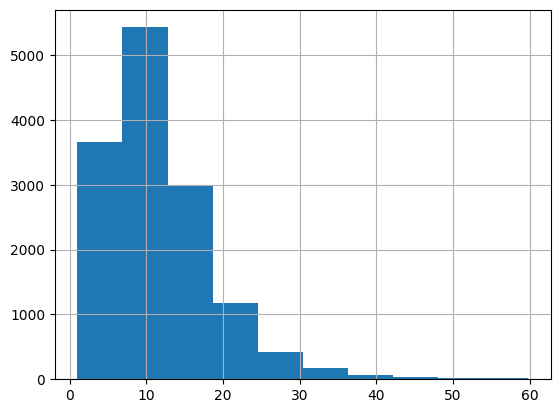

In [10]:
Y_test.hist()